# Assignment 1
## Exercise 1

In [1]:
from sympy import init_session
from sympy.printing import latex, print_latex
init_session()
h = symbols("h")

IPython console for SymPy 1.13.3 (Python 3.11.11-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



In [2]:
def factorial(x):
    if x == 0:
        return 1
    else:
        return x*factorial(x-1)
factorial(4)

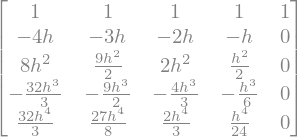

In [3]:
a = lambda m, n: (m*h)**n / factorial(n)
def myMatrix(alpha, beta):
    stencil_range = range(-alpha, beta+1)
    return Matrix([[a(m,n) for m in stencil_range] for n in range(len(stencil_range))])
# AA = Matrix([[a(-4, 0), a(-3, 0), a(-2, 0), a(-1, 0), a(0, 0)],
#             [a(-4, 1), a(-3, 1), a(-2, 1), a(-1, 1), a(0, 1)],
#             [a(-4, 2), a(-3, 2), a(-2, 2), a(-1, 2), a(0, 2)],
#             [a(-4, 3), a(-3, 3), a(-2, 3), a(-1, 3), a(0, 3)],
#             [a(-4, 4), a(-3, 4), a(-2, 4), a(-1, 4), a(0, 4)]])
# A = Matrix([[a(m, n) for m in stencil] for n in len(stencil)])
A = myMatrix(4, 0)
A

In [4]:
vec = Matrix([[i] for i in [0, 0, 1, 0, 0]])
vec

In [5]:
res1 = A.inv()*vec

In [6]:
print_latex(res1.T)

\left[\begin{matrix}\frac{11}{12 h^{2}} & - \frac{14}{3 h^{2}} & \frac{19}{2 h^{2}} & - \frac{26}{3 h^{2}} & \frac{35}{12 h^{2}}\end{matrix}\right]


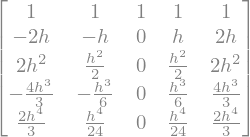

In [7]:
B = myMatrix(2, 2)
B

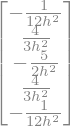

In [8]:
res2 = B.inv()*vec
res2

In [9]:
print_latex(res2.T)

\left[\begin{matrix}- \frac{1}{12 h^{2}} & \frac{4}{3 h^{2}} & - \frac{5}{2 h^{2}} & \frac{4}{3 h^{2}} & - \frac{1}{12 h^{2}}\end{matrix}\right]


## Exercise 1.b)

$$\begin{align}
    &&C_n &= -\delta_{nq}h^{-1} + \sum_{m=-\alpha}^\beta a_m\frac{m^n}{n!}
    \\
    &&\Rightarrow C_n &= -\delta_{n2}h^{-n} + \sum_{m=-\alpha}^\beta a_m\frac{m^2}{n!}
    \\
    (\alpha,\beta) = (4,0): && \quad C_2 &= h^{-2} + \left(a_{-4}(-4)^2 + a_{-3}(-3)^2 + a_{-2}(-2)^2 + a_{-1}(-1)^2\right)\frac{1}{2}
    \\
    && &= h^{-2} + \left(\frac{11}{12}16 - \frac{14}{3}9  + \frac{19}{2}4 - \frac{26}{3}\right)\frac{1}{2h^2}
\end{align}$$

In [10]:
import numpy as np
def delta(n,q):
    if n == q:
        return 1
    else: 
        return 0
q = 2
h_tmp = h
alpha, beta = 2, 2
for n in range(0, 8):
    tmp_res = - delta(n, q)/h**n + (res2.T * Matrix([m**n/factorial(n) for m in range(-alpha, beta+1)]))[0]
    tmp_res = tmp_res.subs(h, h_tmp)
    if ("h" in str(tmp_res)) and (np.abs(tmp_res*h**2) < 1e-14):
        tmp_res = 0
    print(f"C_{n} = {tmp_res}")

C_0 = 0
C_1 = 0
C_2 = 0
C_3 = 0
C_4 = 0
C_5 = 0
C_6 = -0.0111111111111111/h**2
C_7 = 0


In [11]:
alpha, beta = 2, 2
n_max = 10
for n in range(0, n_max+1):
    Cn = - delta(n,2)/h**q
    for m, a_m in zip(range(-alpha, beta+1), res2):
        Cn += a_m * (m)**n / factorial(n)
    print(f"C_{n} = {Cn}") 

C_0 = 0
C_1 = 0
C_2 = 0
C_3 = 0
C_4 = 0
C_5 = 0
C_6 = -1/(90*h**2)
C_7 = 0
C_8 = -1/(1008*h**2)
C_9 = 0
C_10 = -1/(21600*h**2)


## Exercise 1.c)

In [12]:
from scipy.special import factorial
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np

def fdcoeff(k, stencil):
    N = len(stencil)
    # A = np.empty(shape=(N, N))
    # for j, m in enumerate(stencil):
    #     for i, n in enumerate(range(N)):
    #         A[i,j] = m**n/factorial(n)
    A = np.array([[m**n/factorial(n) for m in stencil] for n in range(N)], dtype=np.float64)
    b = np.zeros(N)
    # print(f" fdcoeff: {stencil = }")
    b[k] = 1
    return linalg.solve(A, b)
fdcoeff(2, range(-1, 5))

array([ 0.83333333, -1.25      , -0.33333333,  1.16666667, -0.5       ,
        0.08333333])

In [13]:
def fdm(func, k, xbar, stencil, h=1e-2, *, VERBOSE=False):
    x = xbar + np.array(stencil) * h
    am = fdcoeff(k, stencil) # get coefficients
    if VERBOSE: 
        print(f"{am = }")
    return (func(x) @ am) / h**k

# define u(x), u'(x), and u''(x)
u = lambda x: np.exp(np.cos(x))
dudx2 = lambda x: (np.sin(x)**2 - np.cos(x)) * np.exp(np.cos(x))
dudx = lambda x: -np.sin(x)*np.exp(np.cos(x))

xbar = 0
alpha, beta = 2, 2
stencil_center = np.arange(-alpha, beta+1)
err = np.abs(dudx2(xbar) - fdm(u, 2, xbar, stencil_center, h=1/2, VERBOSE=False))
print(err)

0.04528421961017104


## Exercise 1.d)

Using absolute error
Using absolute error


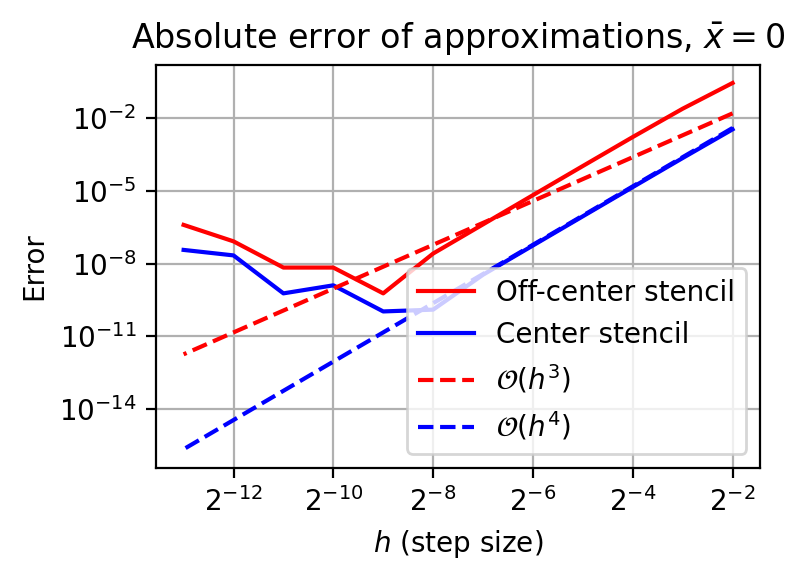

In [25]:
def convergence(exact, approx, lower=2, upper=14, which="abs"):
    s = np.arange(lower, upper)
    hs = 0.5**s
    if (which.lower() == "abs") or  (which.lower() == "absolute"):
        print("Using absolute error")
        denom = 1
    elif (which.lower() == "rel") or (which.lower() == "relative"):
        denom = np.abs(exact)
    err = np.array([np.abs(exact - approx(h)) / denom for h in hs], dtype=np.float64)
    return hs, err

stencil_off_center = np.arange(-4, 1)


xbar = 0
exact = dudx2(xbar)

approx_center = lambda hp: fdm(u, 2, xbar, stencil_center, h=hp)
approx_off = lambda hp: fdm(u, 2, xbar, stencil_off_center, h=hp)

colors = ["r", "b"]
fig, ax = plt.subplots(dpi=200, figsize=(4,3))
for i, (func, label) in enumerate(zip([approx_off, approx_center], ["Off-center stencil", "Center stencil"])):
    hs, errors = convergence(exact, func, which="abs")
    ax.plot(hs, errors, label=label, color=colors[i])
    
O3 = dict(label=r"$\mathcal{O}(h^3)$", linestyle="--", color=colors[0])
O4 = dict(label=r"$\mathcal{O}(h^4)$", linestyle="--", color=colors[1])
ax.plot(hs, hs**3, **O3)
ax.plot(hs, hs**4, **O4)
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_ylabel("Error")
ax.set_xlabel("$h$ (step size)")
ax.grid()
ax.set_title(f"Absolute error of approximations, $\\bar{{x}} = {xbar}$")
ax.legend()
fig.tight_layout()
# ax.draw()

## Exercise 1.e)

In [15]:
# alpha, beta = 3, 
n_max = 10
for n in range(0, n_max+1):
    Cn = - delta(n,2)/h**q
    for m, a_m in zip(np.array((-3, -1, 1, 3))*1/2, res2):
        Cn += a_m * (m)**n / factorial(n)
    print(f"C_{n} = {Cn}") 

C_0 = 0.0833333333333333/h**2
C_1 = 0.208333333333333/h**2
C_2 = 0.260416666666667/h**2
C_3 = 0.717013888888889/h**2
C_4 = 0.260633680555556/h**2
C_5 = 0.0886501736111111/h**2
C_6 = 0.019750072337963/h**2
C_7 = 0.00479665281911376/h**2
C_8 = 0.000794433916687335/h**2
C_9 = 0.00015006045745724/h**2
C_10 = 1.98633596520085e-5/h**2


stencil = [-1.5 -0.5  0.5  1.5]
Am = [-0.0625  0.5625  0.5625 -0.0625]


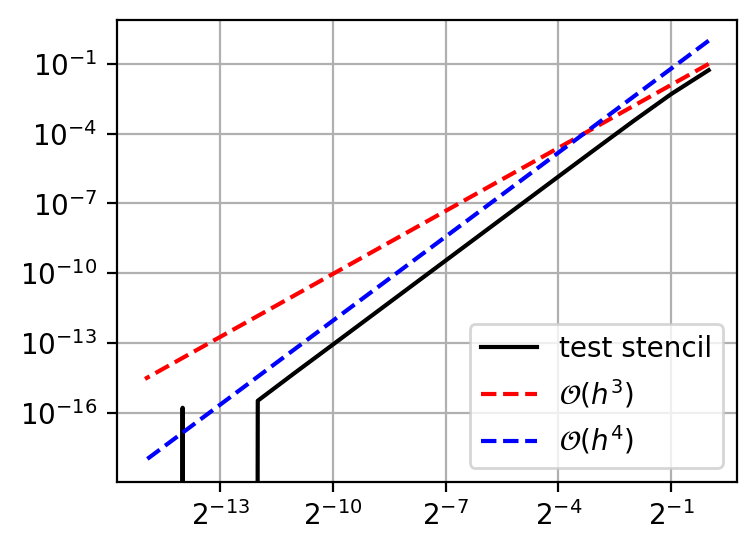

In [16]:
xbar = 0
alpha, beta = 1, 3

# stencil = np.arange(-alpha, beta+1) * 1/2
stencil = np.array((-3, -1, 1, 3)) * 1/2
print(f"stencil = {stencil}")
print(f"Am = {fdcoeff(0, stencil)}")
# print(f"Am = {np.isclose(np.array((-1/16, 9/16, 9/16, -1/16)), fdcoeff(0, stencil))}")

approx_tes = lambda hp: fdm(func=u, k=0, xbar=xbar, stencil=stencil, h=hp)
hs, err = convergence(exact=u(xbar), approx=approx_tes, lower=0, upper=16, which="rel")
fig, ax = plt.subplots(dpi=200, figsize=(4,3))
ax.plot(hs, err, label = "test stencil", color="k")
ax.plot(hs, 0.1*(hs)**3, **O3)
ax.plot(hs, (hs)**4, **O4)
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.legend(loc="lower right")
ax.grid()
